In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

import keras
from keras.models import Sequential
from keras import optimizers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [14]:
from modules import select_group, model_train, y_pred, make_testset

## 원하는 Group 추출

In [3]:
#  group( n, k)   n=그룹 번호 /  k = 3개년도로 다음년도를 예측

trainX, trainY, testX, testY, group_01_X = select_group(0, 3)

In [4]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((5, 3, 29), (5,), (1, 3, 29), (1,))

## Model Training

In [5]:
# 모델학습 함수

model, hist = model_train(trainX, trainY, testX, testY, epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 128)            80896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 212,609
Trainable params: 212,609
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 5 samples, validate on 1 samples
Epoch 1/100
5/5 [==============================] - 2s 478ms/step - loss: 0.0035 - val_loss: 0.0841
Epoch 2

5/5 [==============================] - 0s 2ms/step - loss: 6.0555e-04 - val_loss: 1.6861e-04
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: 5.9529e-04 - val_loss: 1.0901e-04
Epoch 68/100
5/5 [==============================] - 0s 3ms/step - loss: 5.7957e-04 - val_loss: 5.5391e-05
Epoch 69/100
5/5 [==============================] - 0s 3ms/step - loss: 5.7436e-04 - val_loss: 2.3774e-05
Epoch 70/100
5/5 [==============================] - 0s 2ms/step - loss: 5.8169e-04 - val_loss: 1.1757e-05
Epoch 71/100
5/5 [==============================] - 0s 2ms/step - loss: 5.8977e-04 - val_loss: 1.1498e-05
Epoch 72/100
5/5 [==============================] - 0s 3ms/step - loss: 5.8808e-04 - val_loss: 2.1082e-05
Epoch 73/100
5/5 [==============================] - 0s 3ms/step - loss: 5.7874e-04 - val_loss: 4.2083e-05
Epoch 74/100
5/5 [==============================] - 0s 3ms/step - loss: 5.7200e-04 - val_loss: 6.9905e-05
Epoch 75/100
5/5 [==============================] - 0s 3ms/

## 학습과정 Loss

No handles with labels found to put in legend.


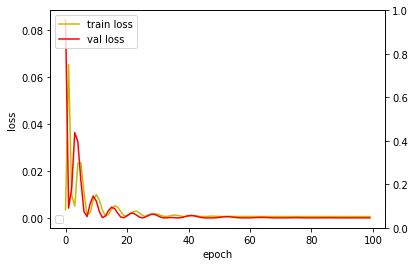

In [6]:
# 학습 과정 살펴보기

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

### Test set으로 Predict

In [9]:
result, RMSE, MAE, MAPE = y_pred(testX, testY, model)

1/1 [==============================] - 0s 2ms/step


In [19]:
print("Target 값의 예측값과 실제값")
result

Target 값의 예측값과 실제값


,0
y_pred,0.069953
real_y,0.072436


#### 실제로 목표로하는 2020년 Target값을 예측하기 위한 Test X data set

In [20]:
predict_next_X = make_testset(group_01_X)

In [22]:
y_pred_20 = model.predict(predict_next_X, batch_size=1)
y_pred_20

array([[0.06884553]], dtype=float32)